# BlackBelt Consulting

## 1. Benson Project

### 1.1 Data Collection

In [1]:
import pandas as pd
import datetime

In [2]:
numdays = 353  # setting the number of days we want to take back 1 week from 06-29
# We want data for this year (1st semester) and the last quarter of 2018 (so we can analyze the holiday's season)

In [3]:
date_time_str = '2019-06-22 08:15:27.243860'  # penultimate date of the range in the MTA website
date_time_obj = datetime.datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f')  
# transforming it to a date_time object
date_time_obj

datetime.datetime(2019, 6, 22, 8, 15, 27, 243860)

In [4]:
date_list = [date_time_obj - datetime.timedelta(days=x) for x in range(0, numdays, 7)]
# creating a list of dates that starts on the penultimate date and goes back the numdays we've set 
# (jumping 7 days each time)
date_list

[datetime.datetime(2019, 6, 22, 8, 15, 27, 243860),
 datetime.datetime(2019, 6, 15, 8, 15, 27, 243860),
 datetime.datetime(2019, 6, 8, 8, 15, 27, 243860),
 datetime.datetime(2019, 6, 1, 8, 15, 27, 243860),
 datetime.datetime(2019, 5, 25, 8, 15, 27, 243860),
 datetime.datetime(2019, 5, 18, 8, 15, 27, 243860),
 datetime.datetime(2019, 5, 11, 8, 15, 27, 243860),
 datetime.datetime(2019, 5, 4, 8, 15, 27, 243860),
 datetime.datetime(2019, 4, 27, 8, 15, 27, 243860),
 datetime.datetime(2019, 4, 20, 8, 15, 27, 243860),
 datetime.datetime(2019, 4, 13, 8, 15, 27, 243860),
 datetime.datetime(2019, 4, 6, 8, 15, 27, 243860),
 datetime.datetime(2019, 3, 30, 8, 15, 27, 243860),
 datetime.datetime(2019, 3, 23, 8, 15, 27, 243860),
 datetime.datetime(2019, 3, 16, 8, 15, 27, 243860),
 datetime.datetime(2019, 3, 9, 8, 15, 27, 243860),
 datetime.datetime(2019, 3, 2, 8, 15, 27, 243860),
 datetime.datetime(2019, 2, 23, 8, 15, 27, 243860),
 datetime.datetime(2019, 2, 16, 8, 15, 27, 243860),
 datetime.datetime

In [5]:
# transforming the dates into strings and putting in a list:

url_dates = []

for i in date_list:
    year = str(i.year).replace("20", "")
    day = str(i.day)
    if i.day < 10:
        day = "0" + day
    month = str(i.month)
    if i.month < 10:
        month = "0" + month
    date_str = year + month + day
    url_dates.append(date_str)

In [6]:
# starting the dataframe with the last available date, which is june 29, 19:
df = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_190629.txt")
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,00:00:00,REGULAR,7107725,2407457
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,04:00:00,REGULAR,7107738,2407465
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,08:00:00,REGULAR,7107761,2407491
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,12:00:00,REGULAR,7107858,2407541
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,16:00:00,REGULAR,7108075,2407581


In [7]:
# concatenating each new date to the original dataframe:
for url in url_dates:
    df2 = pd.read_csv(
        "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt".format(url))
    df = pd.concat([df, df2], ignore_index=True)

In [8]:
df.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
10464970,TRAM2,R469,00-05-00,RIT-ROOSEVELT,R,RIT,07/06/2018,17:00:00,REGULAR,2761,62
10464971,TRAM2,R469,00-05-00,RIT-ROOSEVELT,R,RIT,07/06/2018,21:00:00,REGULAR,2761,62
10464972,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/06/2018,13:00:00,REGULAR,5554,338
10464973,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/06/2018,17:00:00,REGULAR,5554,343
10464974,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/06/2018,21:00:00,REGULAR,5554,343


In [9]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10464975 entries, 0 to 10464974
Data columns (total 11 columns):
C/A                                                                     10464975 non-null object
UNIT                                                                    10464975 non-null object
SCP                                                                     10464975 non-null object
STATION                                                                 10464975 non-null object
LINENAME                                                                10464975 non-null object
DIVISION                                                                10464975 non-null object
DATE                                                                    10464975 non-null object
TIME                                                                    10464975 non-null object
DESC                                                                    10464975 non-null object
ENTRIES     

### 1.2 Data Treatment

In [10]:
# First, let's transform the date and time columns into one column as a datetime object:
df["DATE_TIME"] = pd.to_datetime(df.DATE + " " + df.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10464975 entries, 0 to 10464974
Data columns (total 12 columns):
C/A                                                                     object
UNIT                                                                    object
SCP                                                                     object
STATION                                                                 object
LINENAME                                                                object
DIVISION                                                                object
DATE                                                                    object
TIME                                                                    object
DESC                                                                    object
ENTRIES                                                                 int64
EXITS                                                                   int64
DATE_TIME         

In [15]:
# # Since we want only the last quarter of 2018, let's remove the rows containing 2 september dates (29 and 30):
# sep = (df["DATE"] == '09/29/2018') | (df["DATE"] == '09/30/2018')
# df.drop(df[sep].index, inplace=True)

In [12]:
sorted(df["DATE"].unique())
# no more september dates

['01/01/2019',
 '01/02/2019',
 '01/03/2019',
 '01/04/2019',
 '01/05/2019',
 '01/06/2019',
 '01/07/2019',
 '01/08/2019',
 '01/09/2019',
 '01/10/2019',
 '01/11/2019',
 '01/12/2019',
 '01/13/2019',
 '01/14/2019',
 '01/15/2019',
 '01/16/2019',
 '01/17/2019',
 '01/18/2019',
 '01/19/2019',
 '01/20/2019',
 '01/21/2019',
 '01/22/2019',
 '01/23/2019',
 '01/24/2019',
 '01/25/2019',
 '01/26/2019',
 '01/27/2019',
 '01/28/2019',
 '01/29/2019',
 '01/30/2019',
 '01/31/2019',
 '02/01/2019',
 '02/02/2019',
 '02/03/2019',
 '02/04/2019',
 '02/05/2019',
 '02/06/2019',
 '02/07/2019',
 '02/08/2019',
 '02/09/2019',
 '02/10/2019',
 '02/11/2019',
 '02/12/2019',
 '02/13/2019',
 '02/14/2019',
 '02/15/2019',
 '02/16/2019',
 '02/17/2019',
 '02/18/2019',
 '02/19/2019',
 '02/20/2019',
 '02/21/2019',
 '02/22/2019',
 '02/23/2019',
 '02/24/2019',
 '02/25/2019',
 '02/26/2019',
 '02/27/2019',
 '02/28/2019',
 '03/01/2019',
 '03/02/2019',
 '03/03/2019',
 '03/04/2019',
 '03/05/2019',
 '03/06/2019',
 '03/07/2019',
 '03/08/20

In [13]:
df.columns = [column.strip() for column in df.columns]

In [14]:
df["TURNSTILE_ID"] = df["C/A"] + " " + df["UNIT"] + " " + df["SCP"] + " " + df["STATION"]

In [15]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,TURNSTILE_ID
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,00:00:00,REGULAR,7107725,2407457,2019-06-22 00:00:00,A002 R051 02-00-00 59 ST
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,04:00:00,REGULAR,7107738,2407465,2019-06-22 04:00:00,A002 R051 02-00-00 59 ST
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,08:00:00,REGULAR,7107761,2407491,2019-06-22 08:00:00,A002 R051 02-00-00 59 ST
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,12:00:00,REGULAR,7107858,2407541,2019-06-22 12:00:00,A002 R051 02-00-00 59 ST
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,16:00:00,REGULAR,7108075,2407581,2019-06-22 16:00:00,A002 R051 02-00-00 59 ST


In [16]:
# Checking if there are readings that are duplicates
(df
 .groupby(["TURNSTILE_ID", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(50)

,TURNSTILE_ID,DATE_TIME,ENTRIES
82713,A011 R080 01-00-03 57 ST-7 AV,2018-12-30 15:00:00,2
281311,A035 R170 00-00-02 14 ST-UNION SQ,2019-03-27 17:00:00,2
2754557,N071 R013 00-00-02 34 ST-PENN STA,2019-02-27 19:00:00,2
2093642,JFK03 R536 00-03-04 JFK JAMAICA CT1,2019-04-07 01:00:00,2
8539468,R283 R221 00-00-00 167 ST,2019-04-15 12:00:00,2
3340444,N120A R153 01-06-00 UTICA AV,2018-07-11 09:00:00,2
8539469,R283 R221 00-00-00 167 ST,2019-04-15 16:00:00,2
9398477,R515 R095 00-00-01 ASTORIA DITMARS,2018-08-07 16:00:00,2
8539472,R283 R221 00-00-00 167 ST,2019-04-16 04:00:00,2
3462783,N135 R385 01-03-01 ROCKAWAY BLVD,2019-03-31 13:00:00,2


In [17]:
# On some days, we seem to have two entries for same time.  Let's take a look at a couple of examples:
mask = ((df["TURNSTILE_ID"] == "N071 R013 00-00-00 34 ST-PENN STA") &
(df["DATE_TIME"].dt.date == datetime.datetime(2019, 2, 27).date()))

df[mask]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,TURNSTILE_ID
3530925,N071,R013,00-00-00,34 ST-PENN STA,ACE,IND,02/27/2019,03:00:00,REGULAR,5869431,16519942,2019-02-27 03:00:00,N071 R013 00-00-00 34 ST-PENN STA
3530926,N071,R013,00-00-00,34 ST-PENN STA,ACE,IND,02/27/2019,07:00:00,REGULAR,5869444,16520153,2019-02-27 07:00:00,N071 R013 00-00-00 34 ST-PENN STA
3530927,N071,R013,00-00-00,34 ST-PENN STA,ACE,IND,02/27/2019,11:00:00,REGULAR,5869635,16521165,2019-02-27 11:00:00,N071 R013 00-00-00 34 ST-PENN STA
3530928,N071,R013,00-00-00,34 ST-PENN STA,ACE,IND,02/27/2019,15:00:00,REGULAR,5869852,16521721,2019-02-27 15:00:00,N071 R013 00-00-00 34 ST-PENN STA
3530929,N071,R013,00-00-00,34 ST-PENN STA,ACE,IND,02/27/2019,19:00:00,REGULAR,2196639,2588468,2019-02-27 19:00:00,N071 R013 00-00-00 34 ST-PENN STA
3530930,N071,R013,00-00-00,34 ST-PENN STA,ACE,IND,02/27/2019,19:00:00,RECOVR AUD,5870225,16522419,2019-02-27 19:00:00,N071 R013 00-00-00 34 ST-PENN STA
3530931,N071,R013,00-00-00,34 ST-PENN STA,ACE,IND,02/27/2019,23:00:00,REGULAR,2196693,2588648,2019-02-27 23:00:00,N071 R013 00-00-00 34 ST-PENN STA
3530932,N071,R013,00-00-00,34 ST-PENN STA,ACE,IND,02/27/2019,23:00:00,RECOVR AUD,5870426,16522677,2019-02-27 23:00:00,N071 R013 00-00-00 34 ST-PENN STA


On this case, the RECOVR AUD seems to be the correct one since the entries and exits values are similar to the other readings.

In [18]:
# Other example:
mask = ((df["TURNSTILE_ID"] == "R205A R014 04-02-01 FULTON ST") &
(df["DATE_TIME"].dt.date == datetime.datetime(2018, 10, 21).date()))

df[mask]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,TURNSTILE_ID
7253466,R205A,R014,04-02-01,FULTON ST,2345ACJZ,IRT,10/21/2018,01:00:00,REGULAR,2244820,489731,2018-10-21 01:00:00,R205A R014 04-02-01 FULTON ST
7253467,R205A,R014,04-02-01,FULTON ST,2345ACJZ,IRT,10/21/2018,01:00:00,RECOVR AUD,2244820,10647811,2018-10-21 01:00:00,R205A R014 04-02-01 FULTON ST
7253468,R205A,R014,04-02-01,FULTON ST,2345ACJZ,IRT,10/21/2018,05:00:00,REGULAR,2244820,489731,2018-10-21 05:00:00,R205A R014 04-02-01 FULTON ST
7253469,R205A,R014,04-02-01,FULTON ST,2345ACJZ,IRT,10/21/2018,09:00:00,REGULAR,2244820,489731,2018-10-21 09:00:00,R205A R014 04-02-01 FULTON ST
7253470,R205A,R014,04-02-01,FULTON ST,2345ACJZ,IRT,10/21/2018,13:00:00,REGULAR,2244820,489731,2018-10-21 13:00:00,R205A R014 04-02-01 FULTON ST
7253471,R205A,R014,04-02-01,FULTON ST,2345ACJZ,IRT,10/21/2018,17:00:00,REGULAR,2244820,489731,2018-10-21 17:00:00,R205A R014 04-02-01 FULTON ST
7253472,R205A,R014,04-02-01,FULTON ST,2345ACJZ,IRT,10/21/2018,21:00:00,REGULAR,2244820,489731,2018-10-21 21:00:00,R205A R014 04-02-01 FULTON ST


On the other hand, in this case, the RECOVR AUD seems to be the wrong one (exits are much larger than the regular exits).

In [19]:
# Since we can't map every one of these ocurrencies, we will remove all the duplicates and try to deal with the 
# aparent register errors in another way later:
df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [20]:
# No duplicate problems anymore:
(df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(15)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2018-06-30 00:00:00,1
6976536,R142,R293,01-00-00,34 ST-PENN STA,2018-07-14 06:00:00,1
6976529,R142,R293,01-00-00,34 ST-PENN STA,2018-07-13 02:00:00,1
6976530,R142,R293,01-00-00,34 ST-PENN STA,2018-07-13 06:00:00,1
6976531,R142,R293,01-00-00,34 ST-PENN STA,2018-07-13 10:00:00,1
6976532,R142,R293,01-00-00,34 ST-PENN STA,2018-07-13 14:00:00,1
6976533,R142,R293,01-00-00,34 ST-PENN STA,2018-07-13 18:00:00,1
6976534,R142,R293,01-00-00,34 ST-PENN STA,2018-07-13 22:00:00,1
6976535,R142,R293,01-00-00,34 ST-PENN STA,2018-07-14 02:00:00,1
6976537,R142,R293,01-00-00,34 ST-PENN STA,2018-07-14 10:00:00,1


In [21]:
df.describe()

,ENTRIES,EXITS
count,1.046480e+07,1.046480e+07
mean,4.033497e+07,3.319718e+07
std,2.077426e+08,1.923960e+08
min,0.000000e+00,0.000000e+00
25%,4.492890e+05,1.896340e+05
50%,2.356565e+06,1.348066e+06
75%,6.869352e+06,4.747031e+06
max,2.144893e+09,2.146093e+09


For our data we are aiming only in the entries since we believe this is a better approach to gauge the number of people that may be focusing on the ads. 

We can see from the table above that the average of cumulative exits is much lower than the entries. This probably happens because many people don't use the turnstiles to exit a station.

Also, people entering the stations are more likely to spend more time inside it than people exiting the station (waiting for the subway to arrive) and therefore, more chances to see the digital banners.

In [22]:
# Conclusion: Drop Exits and Desc Column.  To prevent errors in multiple run of cell, errors on drop is ignored
df = df.drop(["EXITS", "DESC"], axis=1, errors="ignore")

In [23]:
df.reset_index(drop=True)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATE_TIME,TURNSTILE_ID
0,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/28/2019,21:00:00,5554,2019-06-28 21:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT
1,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/28/2019,17:00:00,5554,2019-06-28 17:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT
2,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/28/2019,13:00:00,5554,2019-06-28 13:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT
3,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/28/2019,09:00:00,5554,2019-06-28 09:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT
4,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/28/2019,05:00:00,5554,2019-06-28 05:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT
5,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/28/2019,01:00:00,5554,2019-06-28 01:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT
6,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/27/2019,21:00:00,5554,2019-06-27 21:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT
7,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/27/2019,17:00:00,5554,2019-06-27 17:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT
8,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/27/2019,13:00:00,5554,2019-06-27 13:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT
9,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/27/2019,09:00:00,5554,2019-06-27 09:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT


In [24]:
# There seems to be a problem with 23rd st station (and others) because different stations are named the same way:
df[df["STATION"] == "23 ST"].groupby(["LINENAME"]).mean()

,ENTRIES
LINENAME,
1,5.319540e+06
6,1.120533e+08
CE,2.071969e+07
FM,2.564156e+08
NRW,1.124437e+07


Let's try to solve this by changing only the name of the most important problematic stations (the ones that probably have a high foot traffic and may mess up our results) into "station + line".

We'll do this for:
- 23 st
- 86 st
- 96 st
- 14 st
- 125 st
- Chambers St
- 50 st
- Canal St
- 28 St


In [25]:
# Let's create a new dataframe with only the problematic stations and remove them from the original df.
prob = ((df["STATION"] == '14 ST') |
(df["STATION"] == '23 ST') | 
(df["STATION"] == '86 ST') |
(df["STATION"] == '96 ST') |
(df["STATION"] == 'CANAL ST') |
(df["STATION"] == 'CHAMBERS ST') |
(df["STATION"] == '50 ST') |
(df["STATION"] == '28 ST') |
(df["STATION"] == '125 ST'))
df_prob = df[prob]

In [26]:
df.drop(df[prob].index, inplace=True)
df["STATION"].unique()

array(['RIT-ROOSEVELT', 'RIT-MANHATTAN', 'TOMPKINSVILLE', 'ST. GEORGE',
       'EASTCHSTER/DYRE', 'BAYCHESTER AV', 'GUN HILL RD', 'PELHAM PKWY',
       'MORRIS PARK', 'FLATBUSH AV-B.C', 'NEWKIRK AV', 'BEVERLY RD',
       'CHURCH AV', 'WINTHROP ST', 'STERLING ST', 'PRESIDENT ST',
       'NEW LOTS AV', 'VAN SICLEN AV', 'PENNSYLVANIA AV', 'JUNIUS ST',
       'ROCKAWAY AV', 'SARATOGA AV', 'SUTTER AV-RUTLD', 'CROWN HTS-UTICA',
       'KINGSTON AV', 'NOSTRAND AV', 'FRANKLIN AV', 'EASTN PKWY-MUSM',
       'GRAND ARMY PLAZ', 'BERGEN ST', 'ATL AV-BARCLAY', 'NEVINS ST',
       'HOYT ST', 'BOROUGH HALL', 'CLARK ST', '34 ST-HUDSON YD',
       'FLUSHING-MAIN', 'METS-WILLETS PT', '111 ST', '103 ST-CORONA',
       'JUNCTION BLVD', '90 ST-ELMHURST', '82 ST-JACKSON H',
       '74 ST-BROADWAY', '69 ST', '61 ST WOODSIDE', '52 ST',
       '46 ST BLISS ST', '40 ST LOWERY ST', '33 ST-RAWSON ST',
       'ASTORIA DITMARS', 'ASTORIA BLVD', '30 AV', 'BROADWAY', '36 AV',
       '39 AV', 'QUEENSBORO PLZ', 'COURT 

In [27]:
# For this new df, let's change the STATION to STATION + LINENAME:

df_prob["STATION"] = df_prob["STATION"] + " " + df_prob["LINENAME"]
df_prob.head()

/Users/liviasalgueiro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATE_TIME,TURNSTILE_ID
171875,R305,R206,01-00-02,125 ST 23,23,IRT,06/28/2019,21:00:00,245172960,2019-06-28 21:00:00,R305 R206 01-00-02 125 ST
171874,R305,R206,01-00-02,125 ST 23,23,IRT,06/28/2019,17:00:00,245172563,2019-06-28 17:00:00,R305 R206 01-00-02 125 ST
171873,R305,R206,01-00-02,125 ST 23,23,IRT,06/28/2019,13:00:00,245172050,2019-06-28 13:00:00,R305 R206 01-00-02 125 ST
171872,R305,R206,01-00-02,125 ST 23,23,IRT,06/28/2019,09:00:00,245171827,2019-06-28 09:00:00,R305 R206 01-00-02 125 ST
171871,R305,R206,01-00-02,125 ST 23,23,IRT,06/28/2019,05:00:00,245171667,2019-06-28 05:00:00,R305 R206 01-00-02 125 ST


In [28]:
# Now, let's concatenate this modified df into our original df to bring these stations back:
df = pd.concat([df, df_prob], ignore_index=True)

In [29]:
sorted(df["STATION"].unique())

['1 AV',
 '103 ST',
 '103 ST-CORONA',
 '104 ST',
 '110 ST',
 '111 ST',
 '116 ST',
 '116 ST-COLUMBIA',
 '121 ST',
 '125 ST 1',
 '125 ST 23',
 '125 ST 456',
 '125 ST ACBD',
 '135 ST',
 '137 ST CITY COL',
 '138/GRAND CONC',
 '14 ST 123FLM',
 '14 ST ACEL',
 '14 ST FLM123',
 '14 ST-UNION SQ',
 '145 ST',
 '149/GRAND CONC',
 '14TH STREET',
 '15 ST-PROSPECT',
 '155 ST',
 '157 ST',
 '161/YANKEE STAD',
 '163 ST-AMSTERDM',
 '167 ST',
 '168 ST',
 '169 ST',
 '170 ST',
 '174 ST',
 '174-175 STS',
 '175 ST',
 '176 ST',
 '18 AV',
 '18 ST',
 '181 ST',
 '182-183 STS',
 '183 ST',
 '190 ST',
 '191 ST',
 '2 AV',
 '20 AV',
 '207 ST',
 '21 ST',
 '21 ST-QNSBRIDGE',
 '215 ST',
 '219 ST',
 '225 ST',
 '23 ST 1',
 '23 ST 6',
 '23 ST CE',
 '23 ST FM',
 '23 ST NRW',
 '231 ST',
 '233 ST',
 '238 ST',
 '25 AV',
 '25 ST',
 '28 ST 1',
 '28 ST 6',
 '28 ST NRW',
 '3 AV',
 '3 AV 138 ST',
 '3 AV-149 ST',
 '30 AV',
 '33 ST',
 '33 ST-RAWSON ST',
 '34 ST-HERALD SQ',
 '34 ST-HUDSON YD',
 '34 ST-PENN STA',
 '36 AV',
 '36 ST',
 '3

Now, let's try to calculate the number of real entries in each period of time, since the original data only shows the cumulative entries registered up to that time:


In [30]:
df = df.groupby(["STATION","TURNSTILE_ID", "LINENAME", "DATE", "TIME", "DATE_TIME"],as_index=False).ENTRIES.sum()

In [31]:
df[["PREV_DATETIME", "PREV_ENTRIES"]] = (df
                                                       .groupby(["STATION", "TURNSTILE_ID", "LINENAME"])["DATE_TIME", "ENTRIES"]
                                                       .apply(lambda grp: grp.shift(1)))  

In [32]:
df.head(10)

,STATION,TURNSTILE_ID,LINENAME,DATE,TIME,DATE_TIME,ENTRIES,PREV_DATETIME,PREV_ENTRIES
0,1 AV,H007 R248 00-00-00 1 AV,L,01/01/2019,03:00:00,2019-01-01 03:00:00,14276525,NaT,NaN
1,1 AV,H007 R248 00-00-00 1 AV,L,01/01/2019,07:00:00,2019-01-01 07:00:00,14276565,2019-01-01 03:00:00,14276525.0
2,1 AV,H007 R248 00-00-00 1 AV,L,01/01/2019,11:00:00,2019-01-01 11:00:00,14276733,2019-01-01 07:00:00,14276565.0
3,1 AV,H007 R248 00-00-00 1 AV,L,01/01/2019,15:00:00,2019-01-01 15:00:00,14277178,2019-01-01 11:00:00,14276733.0
4,1 AV,H007 R248 00-00-00 1 AV,L,01/01/2019,19:00:00,2019-01-01 19:00:00,14277679,2019-01-01 15:00:00,14277178.0
5,1 AV,H007 R248 00-00-00 1 AV,L,01/01/2019,23:00:00,2019-01-01 23:00:00,14277982,2019-01-01 19:00:00,14277679.0
6,1 AV,H007 R248 00-00-00 1 AV,L,01/02/2019,03:00:00,2019-01-02 03:00:00,14278032,2019-01-01 23:00:00,14277982.0
7,1 AV,H007 R248 00-00-00 1 AV,L,01/02/2019,07:00:00,2019-01-02 07:00:00,14278106,2019-01-02 03:00:00,14278032.0
8,1 AV,H007 R248 00-00-00 1 AV,L,01/02/2019,11:00:00,2019-01-02 11:00:00,14279160,2019-01-02 07:00:00,14278106.0
9,1 AV,H007 R248 00-00-00 1 AV,L,01/02/2019,15:00:00,2019-01-02 15:00:00,14279791,2019-01-02 11:00:00,14279160.0


In [33]:
# Drop the rows for the earliest date_time in the df
df.dropna(subset=["PREV_DATETIME"], axis=0, inplace=True)

Another issue we found was the fact that the entries counters usually count up, eventually hit some number, and reset to 0. Also, sometimes they also count down as a reverse counter. To solve this, let's use the following function:


In [34]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 10k, then the counter might have been reset.
# 10k seems to be a reasonable number for maximum people entering in a period of hours.
# Just set it to zero as different counters have different cycle limits
df["REAL_ENTRIES"] = df.apply(get_daily_counts, axis=1, max_counter=10000)

13691679 14803646.0
59016696 60365873.0
370386823 370681694.0
2233408 2466148.0
6043643 6409687.0
211722 281044.0
2554135 2742207.0
190088 615955.0
954734234 955485322.0
146 1629651041.0
1628896228 407880.0
13477639 14214275.0
10310850 10830830.0
4748249 5017089.0
1183527 2099247.0
12788603 13465087.0
15736351 16478555.0
7929140 8347850.0
12072605 12628457.0
10838781 11516264.0
36036748 36977530.0
3598453 4424276.0
14011358 14802694.0
166413 664186.0
1408885 1894570.0
2097089095 8585853.0
25412483 2097051492.0
8221910 25517307.0
15070839 15661511.0
13864557 14403309.0
1805805 2364921.0
579796 1305489.0
4594340 5793308.0
11614538 12647834.0
10437179 11220187.0
3621468 4050060.0
4163063 4644952.0
5959006 6125521.0
1121212715 1121305577.0
2025970408 2025875710.0
4389057 4651612.0
48963 248929.0
582452 717006.0
2955233 3075490.0
11234 5605753.0
5599832 13162.0
1681230707 1681141487.0
4351752 4711600.0
5108365 5452810.0
5162835 5489956.0
2794765 3620813.0
4149302 4921823.0
13317143 14017816

2848928 3204170.0
3205387 2849344.0
2702787 3325256.0
12190738 15466827.0
15468462 12191276.0
14858890 15612666.0
323 13588976.0
11 51318.0
1511587 145259.0
147164 1511900.0
13032069 327464.0
476 131396.0
131074 550.0
52562893 53159951.0
2255724 2611457.0
2081420 2432349.0
6060266 1057513.0
459365 6301055.0
2642613 3054117.0
30991 324988.0
1911439 2156025.0
1875973 2165011.0
4678101 5231799.0
458754 5067.0
4615 458835.0
230580 361365.0
799576 1191847.0
2176836 2738673.0
10478937 11104035.0
21915345 22355016.0
22081125 22620069.0
18865899 19397181.0
2834561 3072296.0
2762084 2936313.0
128589 235818.0
1398606 1460209.0
58482 150253.0
1470073 1578967.0
637270 679723.0
1643366 1681049.0
673034 784065.0
487027 554377.0
1570781 108204.0
30 1580082.0
4072456 4534331.0
1407006 1704332.0
7034227 7305802.0
2708058 3037094.0
359275 679515.0
304682 649178.0
157050 575607.0
134582410 476783.0
401842 134624581.0
201760021 201884403.0
4596811 5066376.0
6637943 6949273.0
3532137 3897046.0
50349452 198

1554439588 1076226.0
62 1553983520.0
67598819 10730723.0
10731304 67598819.0
67604768 10755609.0
10757180 67604768.0
10267007 10992241.0
5185516 14630916.0
14631708 5185516.0
5196016 14655214.0
14656605 5196016.0
14111319 14916916.0
84779326 85055931.0
1243305 1504020.0
8848396 9442445.0
6792703 7408125.0
8668223 9163154.0
1416891 1785014.0
86033 286545.0
3749848 3920930.0
57600328 57969609.0
11489000 12046184.0
2726993 3398166.0
1042290646 1043117439.0
1054964 740277.0
410 1635517.0
6065785 7084648.0
14510645 15539266.0
3433202 4356171.0
842992 913336.0
976237 1537390.0
39191 418557.0
1217286 1551482.0
101840 384410.0
5876302 6365354.0
4099653 4921700.0
1256650 2315715.0
26684334 28065181.0
1256508651 1254958900.0
9431426 1058340.0
44 9652856.0
579 112648.0
12 286376.0
7178 552543411.0
552542449 7738.0
6718661 473002.0
473020 6718661.0
6749425 473529.0
473562 6749425.0
462344 479280.0
15167158 2301300.0
2301368 15167158.0
15198190 2302645.0
2302715 15198190.0
2274946 2315452.0
4022941

695606 809975.0
3669862 3864484.0
1465267 219440.0
73 1512945.0
4093654 4501448.0
4014139 4139881.0
185408 327053.0
460297 475136.0
5903864 6075005.0
4475026 4892999.0
5685206 6172804.0
5286794 5886927.0
2539922 3004096.0
6580147 6890957.0
1337756 1571123.0
11909941 12586452.0
124033 710927.0
3384851 3920524.0
8346198 8796098.0
6829331 7224354.0
5769941 6105288.0
3331017 3794613.0
5071891 5603000.0
14056577 14840442.0
1263099 1318975.0
16 268334.0
67135923 11052.0
262159 67148734.0
10847115 11263477.0
914785 1178339.0
4389491 4564482.0
556244 654135.0
5262505 239634.0
23 5412842.0
2186293 2428094.0
7056086 7360264.0
2621697 3177582.0
72513 124974.0
2596536 2699458.0
941715 1170028.0
13493716 14056538.0
13339307 14043763.0
1342616 1750164.0
7431499 7865513.0
2086872 2519819.0
5600440 6062293.0
2464242 2924498.0
2591926 3063873.0
5855715 6238253.0
825729 971161.0
1609227 1871282.0
1621919 1828307.0
5580075 5650875.0
5855479 145100.0
0 5877814.0
744788 941015.0
5211217 5420157.0
11951493 

28 222451.0
25 301490.0
23 281294.0
21 184087.0
1692804 299606.0
24 1814923.0
5009978 5542727.0
1820030 2443605.0
5399978 509077.0
258 5602706.0
6535961 1872684.0
1376535 6741744.0
1513112580 1514012556.0
10714988 12018212.0
1228142568 1229012765.0
10141092 10705493.0
11488547 12097564.0
2506115 3126266.0
690651060 690048800.0
10 7603756.0
6911027 102566.0
16822643 608882.0
134 16835516.0
73 456182.0
19589852 20843270.0
17351962 18548791.0
914466 1588084.0
914168 1567304.0
725473 1270477.0
616151 1072535.0
582329 1008475.0
845184 1397066.0
1324913 2246511.0
2163008 3687521.0
160315 291367.0
263230 460416.0
375538 653603.0
450655 811258.0
770946 1331890.0
768098 1520156.0
240073 1453163.0
4113391 4265606.0
2483262 2753898.0
7689748 8280698.0
164209 188305.0
2354977 2369617.0
3401299 3423650.0
67393513 67627953.0
499958 525849.0
103486086 103703894.0
515459 732719.0
458876 665493.0
297398758 297493232.0
600142 243100.0
160 663801.0
4060097 4230075.0
671855 801715.0
947048 1072256.0
57143

1178879075 4472670.0
4256891 1178911085.0
8206721 8505435.0
4564422 4720977.0
259136 484441.0
4970840 5618268.0
6597101 7272165.0
778708 1346692.0
9428378 9890705.0
490778 662505.0
202220 638367.0
413440 402603.0
4835861 4976478.0
2973160 3056724.0
4858055 5044057.0
134247058 134329537.0
5208425 5683431.0
5458781 5636330.0
2921978 3058361.0
819 1522416.0
1095902 154735.0
425 7744652.0
7222912 168390.0
137 3191017.0
2691729 167173.0
8104923 8581996.0
7785520 18099790.0
18099882 7785520.0
17789669 18274135.0
5517690 6026516.0
8235388 8649711.0
738110 928142.0
1500961 1756312.0
326 3756473.0
3312407 85749.0
516079 579408.0
1595792 1791918.0
8 2021820.0
1714416 40887.0
3127516 3599442.0
393216 0.0
0 393216.0
50331648 0.0
0 50331648.0
1928603561 409.0
367 1928603554.0
655711 3263006.0
131182 737713.0
2972075 200542.0
2321619 2695248.0
7347786 7722647.0
827628 1038345.0
3624817 3862538.0
524298 5853002.0
393384915 393169694.0
775999015 775271735.0
863124 2044480.0
13869109 14622062.0
2229666

8561961 8898618.0
1753701 2053886.0
70687 489411.0
2113723 2703550.0
1916111 2181568.0
4203253 4462213.0
67271156 67564615.0
13352797 13737504.0
3584178 3760609.0
0 126782.0
39 194814.0
42 19188.0
1005421 1303172.0
3275149 3489055.0
101150 370466.0
11952604 12627821.0
4 14176715.0
13657689 333845.0
0 13480116.0
0 71826.0
13001908 237415.0
1122 8296931.0
7737713 241828.0
605331 764783.0
2453869 2655783.0
1118046 1438778.0
1824419 2368492.0
2543366 2915531.0
2144892848 2590604.0
2591086 2144892848.0
10653626 11306527.0
244 438498743.0
438132669 204275.0
303094340 303385220.0
303164093 303131148.0
303131481 303164093.0
303165663 303132595.0
303132965 303165631.0
3631479 4301281.0
3731441 3698321.0
3699277 3731441.0
51683283 51950382.0
51748392 51715351.0
51715741 51748392.0
259 7083643.0
6738458 251106.0
11120414 11568487.0
2115520532 2115868117.0
104969 386990.0
1726779 2134214.0
7516241 8261558.0
3371367 3765506.0
3125678 3415849.0
9331608 9636629.0
11387695 11854854.0
7557428 8233467.0

2359275 2498127.0
14496695 15088376.0
3087536 3611737.0
5886855 6348564.0
6984047 7457607.0
101091473 101185315.0
3075613 3374046.0
5369919 6228289.0
1165651 1792720.0
9384829 9813738.0
1471431 1592059.0
6281259 6584894.0
2902022 3345345.0
539333121 539679594.0
1560087590 1559961242.0
2617805 2954601.0
7096298 7558359.0
170 374903.0
247279 57616.0
6 1488298.0
1338175 5523.0
7622665 7813554.0
4264831 4415218.0
3962887 4316647.0
738444 1117852.0
1036830 1610113.0
4934304 5625390.0
894979 980753.0
3218416 3257952.0
2750116 2625193.0
2135225 2755488.0
19526502 19967275.0
981 448729.0
22935 50929.0
52 333007.0
282291 9288.0
5931045 1625250504.0
1625620181 6221453.0
571803 1241922493.0
1241776259 750156.0
150 123697.0
39 3912187.0
6259200 51639.0
3759416 6551896.0
3390827 300278556.0
300220487 3863329.0
407351 864059.0
5249787 5828339.0
12 1029102.0
924861 218640.0
230 8945551.0
8529255 102662.0
7711516 8298734.0
1507929 2320044.0
1 458752.0
458752 1.0
27 1048102.0
832580 7104.0
890763 87519

15139131 15772273.0
9444139 10114681.0
1555 1560406.0
1045834 47348.0
2253680 652263.0
115 2290049.0
1112681 1952573.0
979155 1927641.0
1655694 2886431.0
654373970 654355546.0
653576313 654692565.0
688188 1760188.0
945613 2186553.0
4562175 5355366.0
431079 970414.0
1609 733077.0
957828 1539097.0
6735928 7174483.0
29 6333363.0
6093109 54480.0
11 5651802.0
5460565 98840.0
3461875 3812809.0
8336033 8922029.0
14423001 15425628.0
6951691 8311561.0
36750354 38569365.0
502052452 629454.0
1016 501616113.0
4993624 5944711.0
12775105 13535671.0
1144 790332.0
364828 121682.0
334332 665741.0
3161740 3538278.0
91348 517031.0
4130391 4592682.0
5339002 5686904.0
3633688 2362489.0
2099984 3754496.0
393030 3633682.0
3348753 456279.0
26 392982.0
228941 28516.0
35 792033.0
641849 31391.0
5364 201093.0
201262 5364.0
130 355689.0
334140 23331.0
0 371411.0
30655 0.0
145 30655.0
292759 92075.0
92092 292759.0
0 96138.0
38 61933.0
2 23944.0
480359 2473.0
0 493551.0
63 10491.0
0 30337.0
1 23976.0
121573 7106.0


12790 1155130.0
1155525 12790.0
12861 1155525.0
1157352 12980.0
13259 1157352.0
1158130 13259.0
13304 1158130.0
1158278 13304.0
13475 1158278.0
1160284 13475.0
13705 1160284.0
1161002 13705.0
13751 1161002.0
1161113 13751.0
13985 1161113.0
1163420 13985.0
14140 1163420.0
1164090 14140.0
14165 1164090.0
1164216 14165.0
14425 1164216.0
1166637 14425.0
14555 1166637.0
1167437 14555.0
14597 1167437.0
1167601 14597.0
14872 1167601.0
1169858 14872.0
14995 1169858.0
1170579 14995.0
15030 1170579.0
1170688 15030.0
15074 1170688.0
1171744 15074.0
15193 1171744.0
1172410 15193.0
15230 1172410.0
1172522 15230.0
15270 1172522.0
1173310 15270.0
15345 1173310.0
1173777 15345.0
15353 1173777.0
1174238 15353.0
15673 1174238.0
1176396 15673.0
15774 1176396.0
1176893 15774.0
15790 1176893.0
1177664 15790.0
103 60788.0
67 25499.0
0 170345.0
132 119262.0
275 86352.0
109 38108.0
7623 58743.0
0 21827.0
812 24976.0
837 21493.0
1880 170006.0
0 168214.0
335 53638.0
0 14271.0
0 102143.0
70 108677.0
218130 30441

67968043 68390233.0
1165176 1222051.0
1509409 1609019.0
4994603 5270638.0
7751255 8178436.0
720967 1001270.0
5161877 5484002.0
739437 1142240.0
9549799 213066.0
74 9750609.0
4590243 4891820.0
3444750 3734430.0
1167034 1374885.0
1194425 1363670.0
2212123 2541083.0
4754934 5264404.0
4010015 4204352.0
2753181 3140652.0
3168622 3157761.0
2801820 3450929.0
8051949 8500175.0
5115294 5396993.0
5803908 6173262.0
7486714 7775727.0
8892869 9111859.0
12970382 13189338.0
632528 914837.0
759414 1137006.0
50 1164326.0
210 43676.0
896021 51599.0
954185 896148.0
672263 1276580.0
668571 884968.0
2191187 2521349.0
100 335392.0
199796 7330.0
53945 218190.0
218251 53945.0
9 423269.0
3625 31888.0
59 227817.0
45 18401.0
278 72145.0
72604 27244.0
43 96368.0
140 168587.0
322169 20248.0
258 470720.0
0 48136.0
163 77905.0
6173 16610.0
318 43972.0
0 60111.0
0 17065.0
81 196218.0
97 541302.0
384151 9610.0
49 428873.0
262042 10894.0
0 469655.0
11 27735.0
356007 9536.0
71 160694.0
278253 17023.0
7 362554.0
79 11419

446176 774970.0
657688 1142085.0
3335468 3622953.0
5600013 5935080.0
6345403 6883289.0
11366554 12107621.0
13064093 13820144.0
13124283 13879422.0
12383855 13141726.0
8376465 8865372.0
1135523 1291166.0
1776490 2038472.0
1579387 1916096.0
4632671 4994364.0
182 111831.0
165689 50507.0
219 211195.0
262 17937.0
12580693 12949321.0
4210549 4682888.0
8403793 8692353.0
60 401595.0
182344 102016.0
938757 997744.0
1793344 1870026.0
3489340 3645588.0
11895222 12804701.0
10863479 11493862.0
8272 56777.0
59208 45527.0
3521133 133936.0
13 3534776.0
800415 964926.0
2038142 117159.0
0 2062183.0
7 11437.0
159939 245197.0
1568247541 1568779025.0
5880848 6418398.0
1249985 1460350.0
7502369 7927353.0
12759537 13505494.0
14192418 15069026.0
5167574 5691086.0
2745092 3021962.0
2699662 2844036.0
7752571 7846535.0
235110 327388.0
50980703 51321523.0
2135658 2496630.0
1548676 1862430.0
108697 133133.0
132070 180720.0
511258 651340.0
8020143 8038828.0
1858327 2061312.0
471890 893840.0
12812 50168.0
1145621 15

159 121708.0
57628 3908.0
177 52500.0
32880 3.0
65 36596.0
0 18542.0
5453201 6115916.0
2165931 2674598.0
10693809 11288627.0
3815500 4003256.0
2183075 2306039.0
391091 535955.0
5361021 6004053.0
4965123 5614862.0
13274493 14210305.0
14096898 15411891.0
2695630 3093487.0
5220 233349.0
3370567 3551195.0
4845380 5127848.0
101620397 102234373.0
620895247 621370230.0
3442457 4052423.0
14233173 15021242.0
1029702 1553998.0
2678841 2895772.0
5119193 5368833.0
6688964 7033517.0
6626188 6903593.0
6223633 6354619.0
281170 477638.0
913058 1197723.0
917725 964302.0
964752 917725.0
6124107 6536370.0
215849 434615.0
6279261 6597990.0
2962323 3403423.0
1236790 1472692.0
911605 1010403.0
711990 780478.0
241372 298971.0
4847160 5269278.0
9412280 10061828.0
13273455 14083269.0
4834847 5658820.0
4142863 4632326.0
650326 1116950.0
1226502 1918011.0
16605221 17268014.0
2055884 2711149.0
7447994 8186611.0
2454533 1826273.0
10 2479313.0
1114281 6565.0
8001602 8492808.0
614895 1502064.0
7869913 8585439.0
4502

In [35]:
df.head()

,STATION,TURNSTILE_ID,LINENAME,DATE,TIME,DATE_TIME,ENTRIES,PREV_DATETIME,PREV_ENTRIES,REAL_ENTRIES
1,1 AV,H007 R248 00-00-00 1 AV,L,01/01/2019,07:00:00,2019-01-01 07:00:00,14276565,2019-01-01 03:00:00,14276525.0,40.0
2,1 AV,H007 R248 00-00-00 1 AV,L,01/01/2019,11:00:00,2019-01-01 11:00:00,14276733,2019-01-01 07:00:00,14276565.0,168.0
3,1 AV,H007 R248 00-00-00 1 AV,L,01/01/2019,15:00:00,2019-01-01 15:00:00,14277178,2019-01-01 11:00:00,14276733.0,445.0
4,1 AV,H007 R248 00-00-00 1 AV,L,01/01/2019,19:00:00,2019-01-01 19:00:00,14277679,2019-01-01 15:00:00,14277178.0,501.0
5,1 AV,H007 R248 00-00-00 1 AV,L,01/01/2019,23:00:00,2019-01-01 23:00:00,14277982,2019-01-01 19:00:00,14277679.0,303.0


In [36]:
df[df["STATION"] == "GRD CNTRL-42 ST"].sort_values(by=["REAL_ENTRIES"],ascending=False)

,STATION,TURNSTILE_ID,LINENAME,DATE,TIME,DATE_TIME,ENTRIES,PREV_DATETIME,PREV_ENTRIES,REAL_ENTRIES
6953085,GRD CNTRL-42 ST,R238A R046 02-03-01 GRD CNTRL-42 ST,4567S,06/18/2019,20:00:00,2019-06-18 20:00:00,1690214,2019-06-18 16:00:00,1686251.0,3963.0
6948434,GRD CNTRL-42 ST,R238A R046 02-00-04 GRD CNTRL-42 ST,4567S,05/16/2019,20:00:00,2019-05-16 20:00:00,2544354,2019-05-16 16:00:00,2540408.0,3946.0
6952848,GRD CNTRL-42 ST,R238A R046 02-03-01 GRD CNTRL-42 ST,4567S,05/13/2019,20:00:00,2019-05-13 20:00:00,1450391,2019-05-13 16:00:00,1446527.0,3864.0
6948405,GRD CNTRL-42 ST,R238A R046 02-00-04 GRD CNTRL-42 ST,4567S,05/14/2019,20:00:00,2019-05-14 20:00:00,2522656,2019-05-14 16:00:00,2518795.0,3861.0
6955139,GRD CNTRL-42 ST,R238A R046 02-03-02 GRD CNTRL-42 ST,4567S,05/16/2019,20:00:00,2019-05-16 20:00:00,1964402,2019-05-16 16:00:00,1960548.0,3854.0
6952854,GRD CNTRL-42 ST,R238A R046 02-03-01 GRD CNTRL-42 ST,4567S,05/14/2019,20:00:00,2019-05-14 20:00:00,1461256,2019-05-14 16:00:00,1457476.0,3780.0
6948636,GRD CNTRL-42 ST,R238A R046 02-00-04 GRD CNTRL-42 ST,4567S,06/18/2019,20:00:00,2019-06-18 20:00:00,2801644,2019-06-18 16:00:00,2797883.0,3761.0
6948399,GRD CNTRL-42 ST,R238A R046 02-00-04 GRD CNTRL-42 ST,4567S,05/13/2019,20:00:00,2019-05-13 20:00:00,2511662,2019-05-13 16:00:00,2507985.0,3677.0
6950664,GRD CNTRL-42 ST,R238A R046 02-03-00 GRD CNTRL-42 ST,4567S,05/21/2019,20:00:00,2019-05-21 20:00:00,654412924,2019-05-21 16:00:00,654409320.0,3604.0
6950668,GRD CNTRL-42 ST,R238A R046 02-03-00 GRD CNTRL-42 ST,4567S,05/22/2019,12:00:00,2019-05-22 12:00:00,654418954,2019-05-22 08:00:00,654415384.0,3570.0


In [37]:
df["WEEKDAY"] = df["DATE_TIME"].dt.dayofweek
df.head()

,STATION,TURNSTILE_ID,LINENAME,DATE,TIME,DATE_TIME,ENTRIES,PREV_DATETIME,PREV_ENTRIES,REAL_ENTRIES,WEEKDAY
1,1 AV,H007 R248 00-00-00 1 AV,L,01/01/2019,07:00:00,2019-01-01 07:00:00,14276565,2019-01-01 03:00:00,14276525.0,40.0,1
2,1 AV,H007 R248 00-00-00 1 AV,L,01/01/2019,11:00:00,2019-01-01 11:00:00,14276733,2019-01-01 07:00:00,14276565.0,168.0,1
3,1 AV,H007 R248 00-00-00 1 AV,L,01/01/2019,15:00:00,2019-01-01 15:00:00,14277178,2019-01-01 11:00:00,14276733.0,445.0,1
4,1 AV,H007 R248 00-00-00 1 AV,L,01/01/2019,19:00:00,2019-01-01 19:00:00,14277679,2019-01-01 15:00:00,14277178.0,501.0,1
5,1 AV,H007 R248 00-00-00 1 AV,L,01/01/2019,23:00:00,2019-01-01 23:00:00,14277982,2019-01-01 19:00:00,14277679.0,303.0,1


In [38]:
df = df.assign(SESSION=pd.cut(df.DATE_TIME.dt.hour,[0,6,12,18,24],labels=['Dawn','Morning','Afternoon','Evening']))
df

,STATION,TURNSTILE_ID,LINENAME,DATE,TIME,DATE_TIME,ENTRIES,PREV_DATETIME,PREV_ENTRIES,REAL_ENTRIES,WEEKDAY,SESSION
1,1 AV,H007 R248 00-00-00 1 AV,L,01/01/2019,07:00:00,2019-01-01 07:00:00,14276565,2019-01-01 03:00:00,14276525.0,40.0,1,Morning
2,1 AV,H007 R248 00-00-00 1 AV,L,01/01/2019,11:00:00,2019-01-01 11:00:00,14276733,2019-01-01 07:00:00,14276565.0,168.0,1,Morning
3,1 AV,H007 R248 00-00-00 1 AV,L,01/01/2019,15:00:00,2019-01-01 15:00:00,14277178,2019-01-01 11:00:00,14276733.0,445.0,1,Afternoon
4,1 AV,H007 R248 00-00-00 1 AV,L,01/01/2019,19:00:00,2019-01-01 19:00:00,14277679,2019-01-01 15:00:00,14277178.0,501.0,1,Evening
5,1 AV,H007 R248 00-00-00 1 AV,L,01/01/2019,23:00:00,2019-01-01 23:00:00,14277982,2019-01-01 19:00:00,14277679.0,303.0,1,Evening
6,1 AV,H007 R248 00-00-00 1 AV,L,01/02/2019,03:00:00,2019-01-02 03:00:00,14278032,2019-01-01 23:00:00,14277982.0,50.0,2,Dawn
7,1 AV,H007 R248 00-00-00 1 AV,L,01/02/2019,07:00:00,2019-01-02 07:00:00,14278106,2019-01-02 03:00:00,14278032.0,74.0,2,Morning
8,1 AV,H007 R248 00-00-00 1 AV,L,01/02/2019,11:00:00,2019-01-02 11:00:00,14279160,2019-01-02 07:00:00,14278106.0,1054.0,2,Morning
9,1 AV,H007 R248 00-00-00 1 AV,L,01/02/2019,15:00:00,2019-01-02 15:00:00,14279791,2019-01-02 11:00:00,14279160.0,631.0,2,Afternoon
10,1 AV,H007 R248 00-00-00 1 AV,L,01/02/2019,19:00:00,2019-01-02 19:00:00,14280986,2019-01-02 15:00:00,14279791.0,1195.0,2,Evening


### 1.3 Exploratory Data Analysis

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # automatic seaborn settings

%matplotlib inline

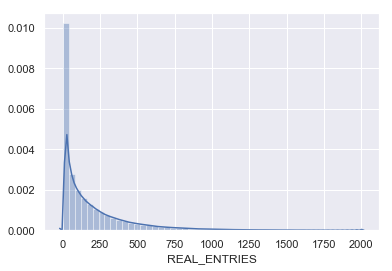

In [40]:
sns.distplot(df['REAL_ENTRIES']
             [df['REAL_ENTRIES'] < 2000]);

In [62]:
# Let's first get the daily entries by station:
stations_daily = \
    (df.groupby(['STATION','DATE',"WEEKDAY"])['REAL_ENTRIES'].sum()
                 .reset_index())  

stations_daily.head()

,STATION,DATE,WEEKDAY,REAL_ENTRIES
0,1 AV,01/01/2019,1,8376.0
1,1 AV,01/02/2019,2,18476.0
2,1 AV,01/03/2019,3,19866.0
3,1 AV,01/04/2019,4,20389.0
4,1 AV,01/05/2019,5,13930.0


In [42]:
# To discover the stations with more entries:
stations = \
    (stations_daily.groupby(['STATION'])['REAL_ENTRIES'].sum()
                   .reset_index()
                   .sort_values(by='REAL_ENTRIES',ascending=False))

stations.head(20)

,STATION,REAL_ENTRIES
72,34 ST-PENN STA,52385203.0
256,GRD CNTRL-42 ST,45775088.0
70,34 ST-HERALD SQ,39469275.0
79,42 ST-PORT AUTH,33092334.0
19,14 ST-UNION SQ,32605239.0
376,TIMES SQ-42 ST,32561499.0
249,FULTON ST,29506917.0
99,59 ST COLUMBUS,23168143.0
98,59 ST,20648058.0
83,47-50 STS ROCK,18005679.0


In [63]:
# To get top 15 stations by daily volume (sum across all days is a reasonable way to define this):
top15_stations = \
    (stations_daily.groupby(['STATION'])['REAL_ENTRIES'].sum()
                   .reset_index()
                   .sort_values(by='REAL_ENTRIES',ascending=False) 
                   .STATION.head(15))

top15_stations

72       34 ST-PENN STA
256     GRD CNTRL-42 ST
70      34 ST-HERALD SQ
79      42 ST-PORT AUTH
19       14 ST-UNION SQ
376      TIMES SQ-42 ST
249           FULTON ST
99       59 ST COLUMBUS
98                59 ST
83       47-50 STS ROCK
240       FLUSHING-MAIN
338        PATH NEW WTC
280     JKSN HT-ROOSVLT
194    CANAL ST JNQRZ6W
110               72 ST
Name: STATION, dtype: object

In [64]:
# next create a new df that filters the stations daily data down to the top 15 stations
stations_daily_top15 = \
    stations_daily[stations_daily['STATION'].isin(top15_stations)]
stations_daily_top15.sort_values(by = 'REAL_ENTRIES')

,STATION,DATE,WEEKDAY,REAL_ENTRIES
29706,47-50 STS ROCK,09/23/2018,6,0.0
86257,FLUSHING-MAIN,03/31/2019,6,0.0
86271,FLUSHING-MAIN,04/14/2019,6,1.0
86278,FLUSHING-MAIN,04/21/2019,6,2.0
86292,FLUSHING-MAIN,05/05/2019,6,2.0
29713,47-50 STS ROCK,09/30/2018,6,2.0
29699,47-50 STS ROCK,09/16/2018,6,5.0
29629,47-50 STS ROCK,07/08/2018,6,35.0
86509,FLUSHING-MAIN,12/09/2018,6,641.0
86508,FLUSHING-MAIN,12/08/2018,5,748.0


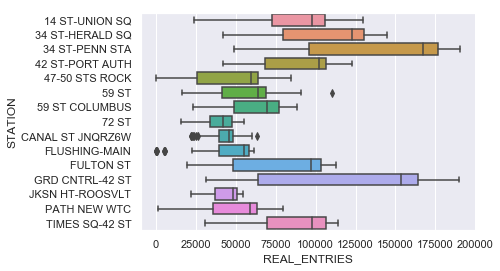

In [65]:
# use seaborn to create a boxplot by station
sns.boxplot('REAL_ENTRIES', 'STATION', data=stations_daily_top15)

In [72]:
avg_per_day = stations_daily_top15.groupby(["STATION"])["REAL_ENTRIES"].mean()
avg_per_day = avg_per_day.to_frame().reset_index()
avg_per_day

,STATION,REAL_ENTRIES
0,14 ST-UNION SQ,89574.832418
1,34 ST-HERALD SQ,108432.074176
2,34 ST-PENN STA,143915.392857
3,42 ST-PORT AUTH,90913.005495
4,47-50 STS ROCK,49466.151099
5,59 ST,56725.434066
6,59 ST COLUMBUS,63648.744505
7,72 ST,40212.807692
8,CANAL ST JNQRZ6W,43652.010989
9,FLUSHING-MAIN,48758.019231


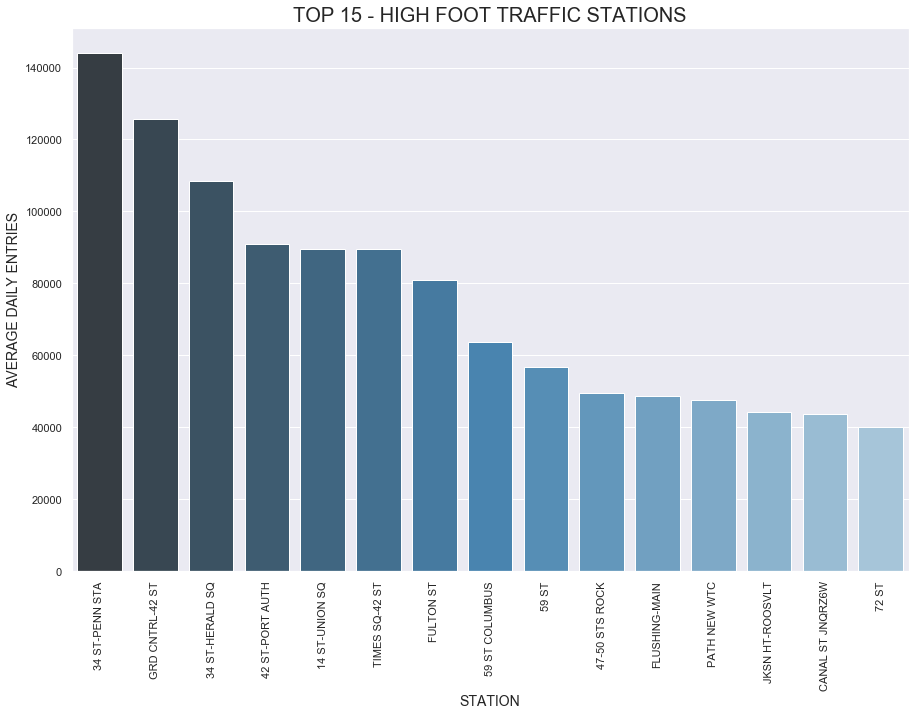

In [104]:
plt.figure(figsize=(15,10))
sns.barplot('STATION', 'REAL_ENTRIES', data=avg_per_day.sort_values(['REAL_ENTRIES'], ascending=False), palette ="Blues_d");

plt.xticks(rotation = 'vertical');
plt.ylabel("AVERAGE DAILY ENTRIES", fontsize=14);
plt.xlabel("STATION", fontsize=14)
plt.title("TOP 15 - HIGH FOOT TRAFFIC STATIONS", fontsize=20);
plt.savefig("plot1.svg")


In [110]:
# Now let's try to find more patterns:

entries_by_weekday = df.groupby(['STATION',"WEEKDAY"])['REAL_ENTRIES'].mean()
entries_by_weekday

STATION          WEEKDAY
1 AV             0          273.059524
                 1          309.126419
                 2          325.818927
                 3          327.594544
                 4          331.484395
                 5          173.662608
                 6          133.950145
103 ST           0          302.901048
                 1          328.012152
                 2          325.538680
                 3          341.909572
                 4          332.855635
                 5          204.319149
                 6          166.101347
103 ST-CORONA    0          339.136316
                 1          353.342504
                 2          364.938050
                 3          340.532365
                 4          365.575885
                 5          253.711436
                 6          192.646143
104 ST           0           68.498756
                 1           74.635689
                 2           76.326971
                 3           76.959542


In [111]:
entries_by_weekday = entries_by_weekday.unstack(level = -1).reset_index()
entries_by_weekday.head()

WEEKDAY,STATION,0,1,2,3,4,5,6
0,1 AV,273.059524,309.126419,325.818927,327.594544,331.484395,173.662608,133.950145
1,103 ST,302.901048,328.012152,325.538680,341.909572,332.855635,204.319149,166.101347
2,103 ST-CORONA,339.136316,353.342504,364.938050,340.532365,365.575885,253.711436,192.646143
3,104 ST,68.498756,74.635689,76.326971,76.959542,74.137079,26.647521,18.452279
4,110 ST,264.190052,283.606540,296.530720,292.494731,289.341759,193.752677,139.947566


In [109]:
entries_weekday_top15 = \
    entries_by_weekday[entries_by_weekday['STATION'].isin(top15_stations)]
entries_weekday_top15

WEEKDAY,STATION,0,1,2,3,4,5,6
19,14 ST-UNION SQ,378.444053,422.188643,448.804012,442.352055,440.658937,316.235929,240.408669
70,34 ST-HERALD SQ,347.047752,363.594993,382.716954,384.731132,383.815861,232.650938,188.207633
72,34 ST-PENN STA,266.240806,283.452581,285.886361,288.654210,275.008871,152.576961,135.354865
79,42 ST-PORT AUTH,309.174875,327.022734,334.376329,339.382973,327.272165,219.865272,189.610507
83,47-50 STS ROCK,247.114506,268.781355,281.606040,290.057655,279.710660,107.728608,81.556813
98,59 ST,185.909316,206.216910,210.577115,212.417728,207.545908,135.232032,95.174086
99,59 ST COLUMBUS,262.749708,293.065145,304.432671,306.949724,288.651535,188.701673,158.103976
110,72 ST,266.264818,285.160797,295.749281,288.100183,292.134575,215.765119,192.517241
194,CANAL ST JNQRZ6W,216.635611,224.418358,231.555939,235.827636,244.662224,203.851011,168.879539
240,FLUSHING-MAIN,307.730637,332.902961,337.262978,331.980126,330.156969,216.540921,171.336662


In [113]:
avg_weekday_top15 = entries_weekday_top15.groupby('STATION').mean()
avg_weekday_top15

WEEKDAY,0,1,2,3,4,5,6
STATION,,,,,,,
14 ST-UNION SQ,378.444053,422.188643,448.804012,442.352055,440.658937,316.235929,240.408669
34 ST-HERALD SQ,347.047752,363.594993,382.716954,384.731132,383.815861,232.650938,188.207633
34 ST-PENN STA,266.240806,283.452581,285.886361,288.654210,275.008871,152.576961,135.354865
42 ST-PORT AUTH,309.174875,327.022734,334.376329,339.382973,327.272165,219.865272,189.610507
47-50 STS ROCK,247.114506,268.781355,281.606040,290.057655,279.710660,107.728608,81.556813
59 ST,185.909316,206.216910,210.577115,212.417728,207.545908,135.232032,95.174086
59 ST COLUMBUS,262.749708,293.065145,304.432671,306.949724,288.651535,188.701673,158.103976
72 ST,266.264818,285.160797,295.749281,288.100183,292.134575,215.765119,192.517241
CANAL ST JNQRZ6W,216.635611,224.418358,231.555939,235.827636,244.662224,203.851011,168.879539


TypeError: object of type 'NoneType' has no len()

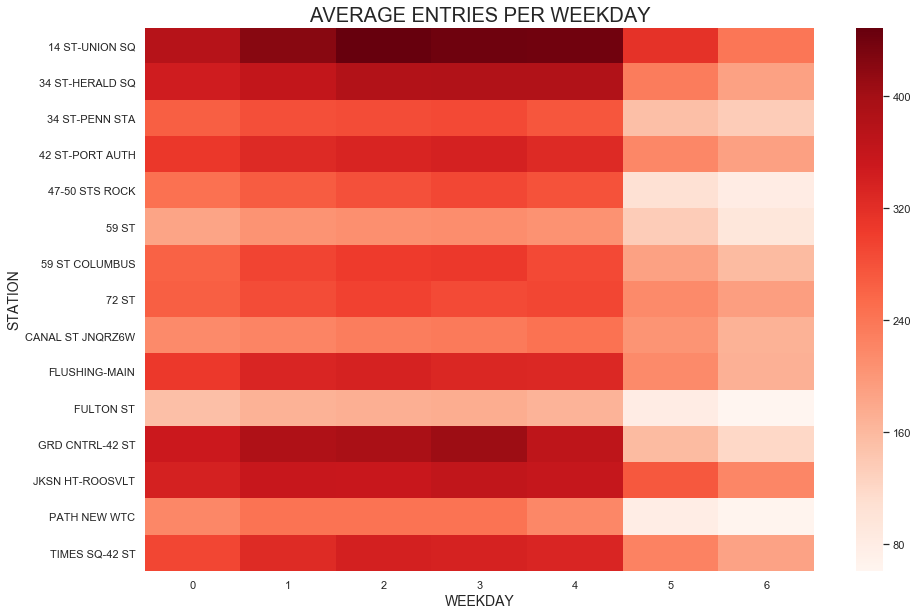

In [119]:
plt.figure(figsize = (15,10))
sns.heatmap(avg_weekday_top15,annot=False, cmap="Reds");
plt.xlabel("WEEKDAY", fontsize=14);
plt.ylabel("STATION", fontsize=14);
plt.title("AVERAGE ENTRIES PER WEEKDAY", fontsize=20)
plt.xticks(labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'])

plt.savefig("plot2.svg")


In [171]:
top_15_stations = df[df['STATION'].isin(top15_stations)]

In [172]:
avg_by_session = top_15_stations.groupby(['STATION',"SESSION"])['REAL_ENTRIES'].mean()

In [173]:
avg_by_session = avg_by_session.unstack(level = -1)
avg_by_session

SESSION,Dawn,Morning,Afternoon,Evening
STATION,,,,
14 ST-UNION SQ,145.737325,176.713647,500.545889,871.100152
34 ST-HERALD SQ,64.221093,201.144994,378.312462,652.204202
34 ST-PENN STA,53.498983,292.600902,281.194190,329.569807
42 ST-PORT AUTH,114.190390,399.271896,302.934213,362.005664
47-50 STS ROCK,44.873242,43.441656,246.662188,630.087434
59 ST,37.913612,115.868784,225.954808,356.254375
59 ST COLUMBUS,53.205794,127.786730,357.764653,525.742501
72 ST,67.267336,213.711168,374.613623,431.981780
CANAL ST JNQRZ6W,60.531024,73.189825,312.444307,511.823102


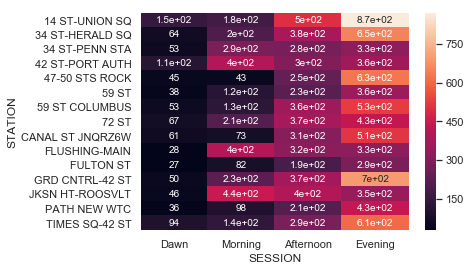

In [174]:
sns.heatmap(avg_by_session,annot=True);

In [213]:
seasonal = top_15_stations.groupby(["STATION", "DATE_TIME"])["REAL_ENTRIES"].sum()

In [214]:
seasonal = seasonal.to_frame().reset_index()

In [215]:
seasonal['DATE'] = seasonal['DATE_TIME'].dt.date

In [216]:
seasonal = seasonal.groupby(["STATION", "DATE"])["REAL_ENTRIES"].sum()

In [217]:
seasonal = seasonal.to_frame().reset_index()
seasonal.head()

,STATION,DATE,REAL_ENTRIES
0,14 ST-UNION SQ,2018-10-01,90397.0
1,14 ST-UNION SQ,2018-10-02,106409.0
2,14 ST-UNION SQ,2018-10-03,113687.0
3,14 ST-UNION SQ,2018-10-04,111533.0
4,14 ST-UNION SQ,2018-10-05,112798.0


In [227]:
seasonal2 = seasonal.groupby("DATE")["REAL_ENTRIES"].sum()
seasonal2 = seasonal2.to_frame().reset_index()
seasonal2["COLUMN"] = "1"

In [228]:
seasonal3 = seasonal2.set_index('DATE').groupby('COLUMN')['REAL_ENTRIES'].rolling(30).mean()
seasonal3 = seasonal3.to_frame().reset_index()
seasonal3.drop(["COLUMN"],axis=1,inplace=True)
seasonal3.dropna(axis=0, inplace=True)

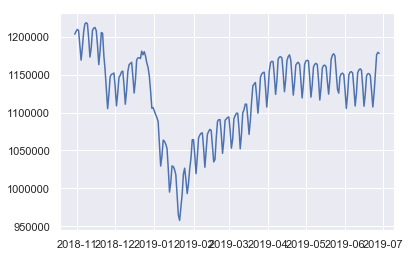

In [230]:
plt.plot(seasonal3['DATE'],seasonal3['REAL_ENTRIES'])